In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Packages
import numpy   as np
import pandas  as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# <a id='0'> Content
- <a href='#d'> Dimensionality Reduction
- <a href='#c'> Clustering

## <a id='d'> Dimensionality Reduction, Feature Extraction and Manifold Learning
- <a href='#0'> Back to TOC 
    
#### Principal Component Analysis (PCA)

##### Applying PCA to the cancer dataset for visualization

The Breast cancer data set

In [9]:
# 0: malignant 212;  1: benign 357
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
cancer.data.shape

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

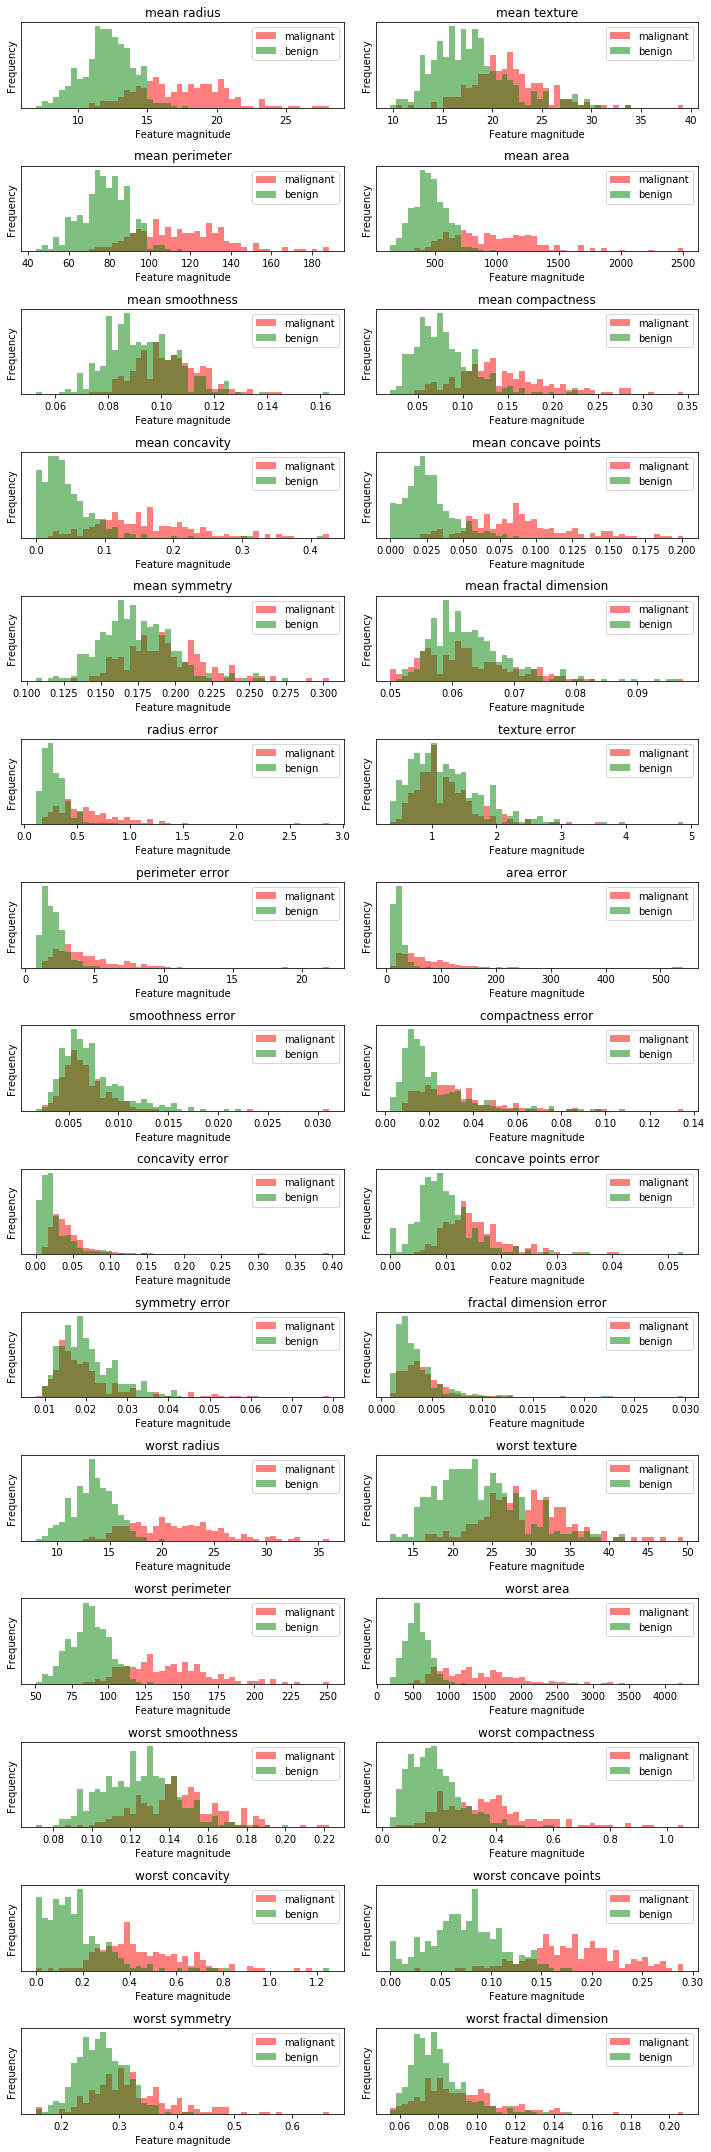

In [33]:
malignant = cancer.data[cancer.target == 0]
benign    = cancer.data[cancer.target == 1]

fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel() # nice trick for easy access

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:, i],    bins=bins, color='g', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Scale the features to have mean 0 and variance 1. This is essential because otherwise features with larger magnitudes will skew the importance of all features.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [45]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA()

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 30)


Text(0,0.5,'Second principal component')

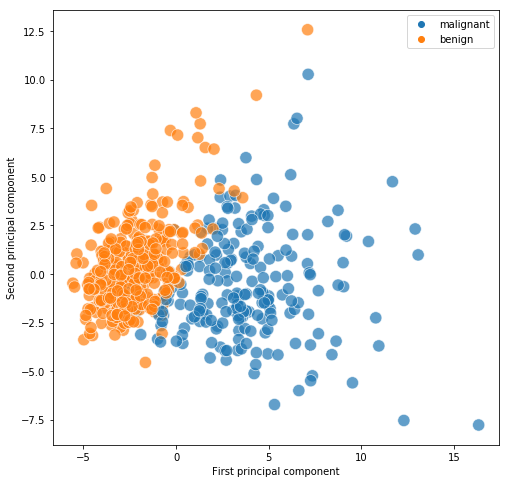

In [49]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=cancer.target_names[cancer.target],s=150,alpha=0.7);
plt.legend(loc="best")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [50]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (30, 30)


In [51]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.7533

Text(0,0.5,'Principal components')

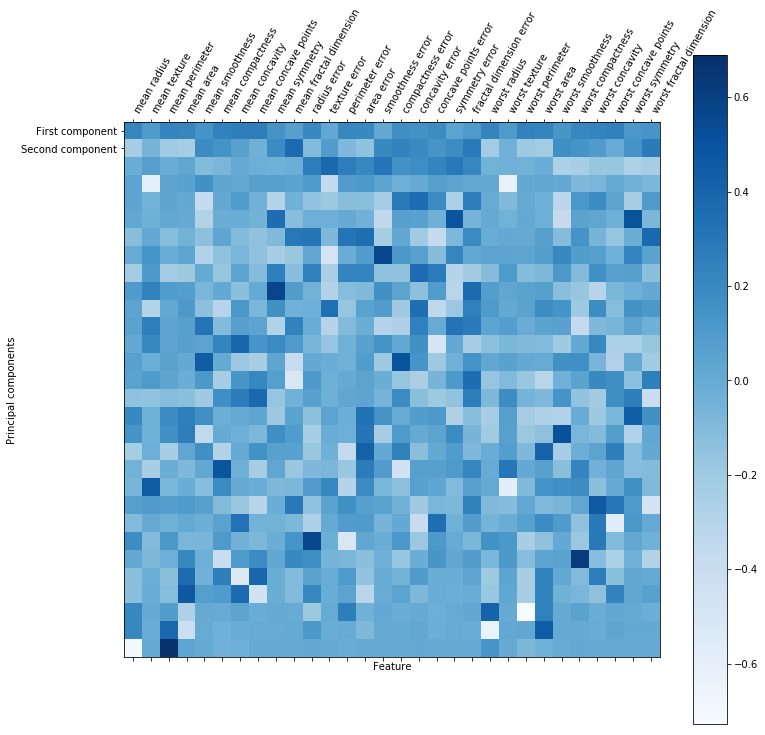

In [65]:
plt.figure(figsize=(12,12))
plt.matshow(pca.components_, cmap='Blues', fignum=1)

plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## <a id='c'> Clustering
- <a href='#0'> Back to TOC

### k-Means clustering

1. Iris data

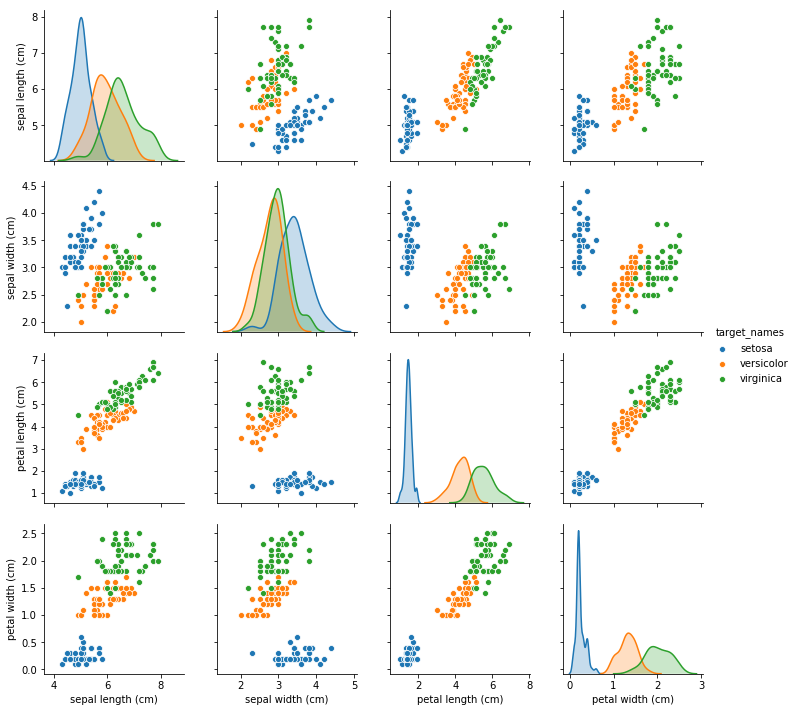

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
    
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target_names'] = data.target_names[data.target]

sns.pairplot(df, hue='target_names');

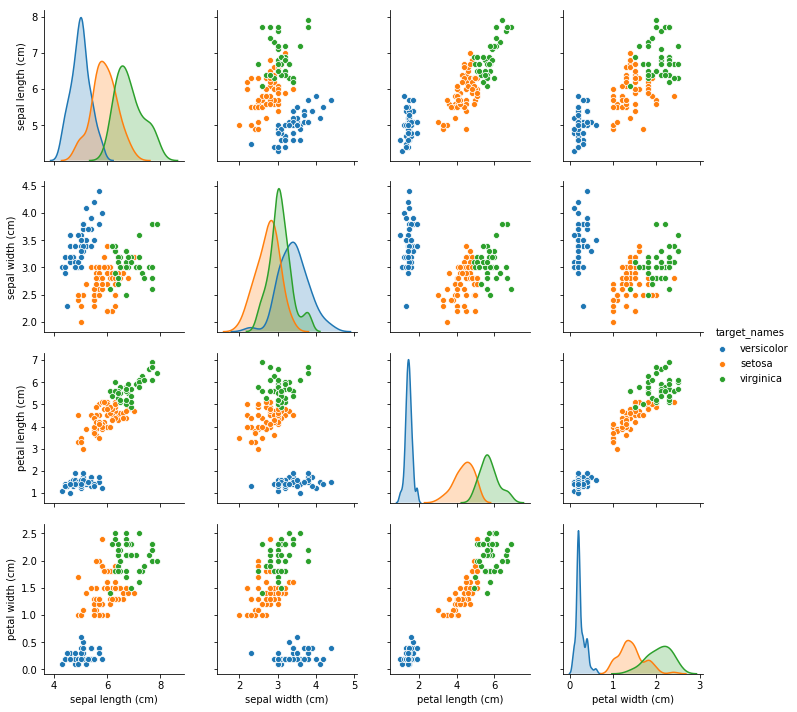

In [4]:
# Kmeans clustering
# notice the ones on the boundary, demonstrating the limitations of Euclidean distance

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
k_means.fit(data.data)
labels = k_means.labels_
type(labels)

#### Choosing optimal k based on Sihouette score

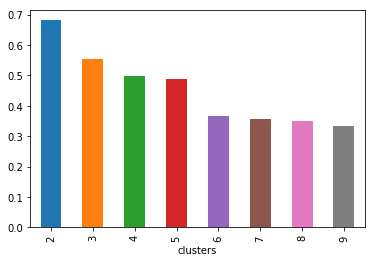

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, silhouette_samples

X = df.drop('target_names', axis=1)

scores = {}

for k in range(2, 10):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)

    labels = k_means.labels_
    score      = silhouette_score(X,   labels)
    #all_scores = silhouette_samples(X, labels)
    scores[k] = score

pd.Series(scores).plot.bar()
plt.xlabel('clusters');

#### Choosing optimal k based on Elbow curve

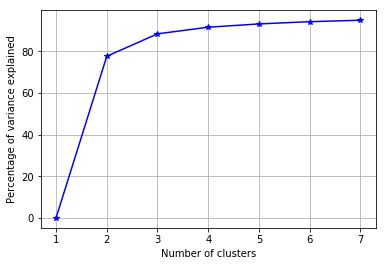

In [8]:
from scipy.spatial.distance import cdist, pdist

X = df.drop('target_names', axis=1)

K = range(1,8)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [km.cluster_centers_ for km in KM]

# distance of all data points to all centroids 
D_k = [cdist(X, centrds, 'euclidean') for centrds in centroids]

# # cluster indices for each data point
# cIdx = [np.argmin(D,axis=1) for D in D_k] # [km.labels_ for km in KM]

# distance to cluster centroid for all data points
dist = [np.min(D,axis=1) for D in D_k]

avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]

tss = sum(pdist(X)**2)/X.shape[0]
# between-cluster SS
bss = tss-wcss

# elbow curve - percentage of variance explained
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained');

### PCA

Text(0,0.5,'Explained Var')

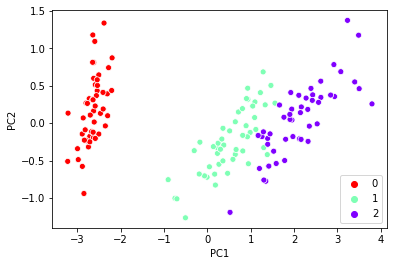

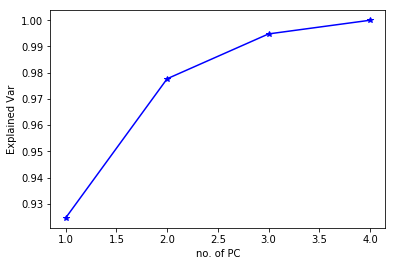

In [9]:
from sklearn.decomposition import PCA

data = load_iris()    
X = data.data
y = data.target

pca = PCA(n_components=4)
X_pc = pca.fit_transform(X)
var = pca.explained_variance_ratio_
var_cumulative = [sum(var[:i+1]) for i in range(len(var))]
#print(var_cumulative)
#plt.scatter(X_pc[:,0], X_pc[:,1], c=y, cmap='rainbow')
sns.scatterplot(X_pc[:,0], X_pc[:,1], y, palette='rainbow_r')
plt.xlabel('PC1')
plt.ylabel('PC2')
pca_df = pd.DataFrame(pca.components_, columns=data.feature_names)
pca_df['explained_var'] = pca.explained_variance_ratio_
pd.set_option('precision', 2)
pca_df

plt.figure().add_subplot()
plt.plot(list(range(1,5)), var_cumulative, 'b*-')
plt.xlabel('no. of PC')
plt.ylabel('Explained Var')

In [10]:
k_means.labels_, data.target

(array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
        0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4,
        4, 0, 4, 0, 4, 0, 7, 7, 7, 2, 7, 8, 7, 2, 7, 2, 2, 8, 2, 8, 2, 7,
        8, 8, 8, 2, 3, 8, 3, 8, 7, 7, 7, 7, 8, 2, 2, 2, 8, 3, 8, 8, 7, 8,
        8, 2, 8, 8, 8, 2, 8, 8, 8, 8, 2, 8, 6, 3, 1, 6, 6, 5, 8, 1, 1, 5,
        6, 3, 6, 3, 3, 6, 6, 5, 5, 3, 6, 3, 5, 3, 6, 1, 3, 3, 6, 1, 1, 5,
        6, 3, 3, 5, 6, 6, 3, 6, 6, 6, 3, 6, 6, 6, 3, 6, 6, 3], dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 

##### Failure cases of k-Means

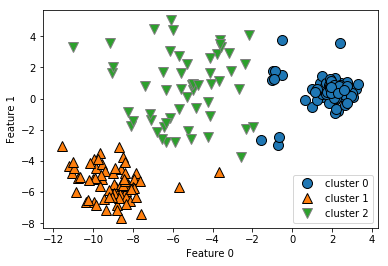

In [16]:
import mglearn
from sklearn.datasets import make_blobs
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

Text(0,0.5,'Feature 1')

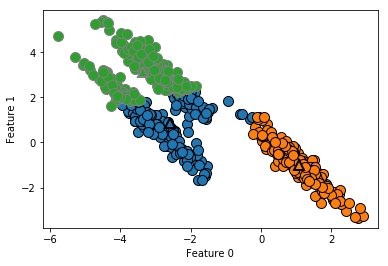

In [17]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

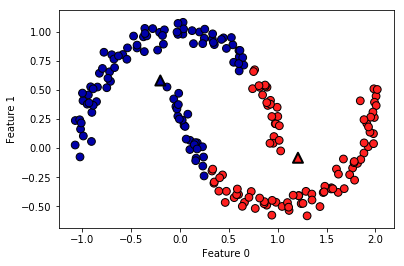

In [18]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Hierarchical Clustering and Dendrograms

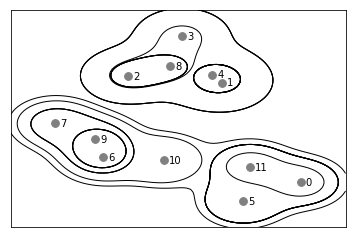

In [25]:
mglearn.plots.plot_agglomerative()

Text(0,0.5,'Cluster distance')

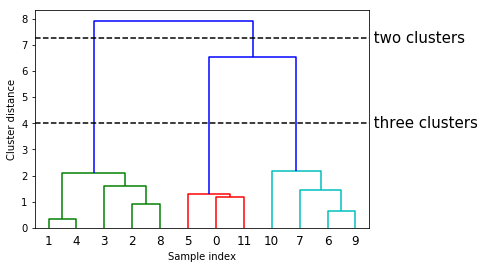

In [26]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

#### DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


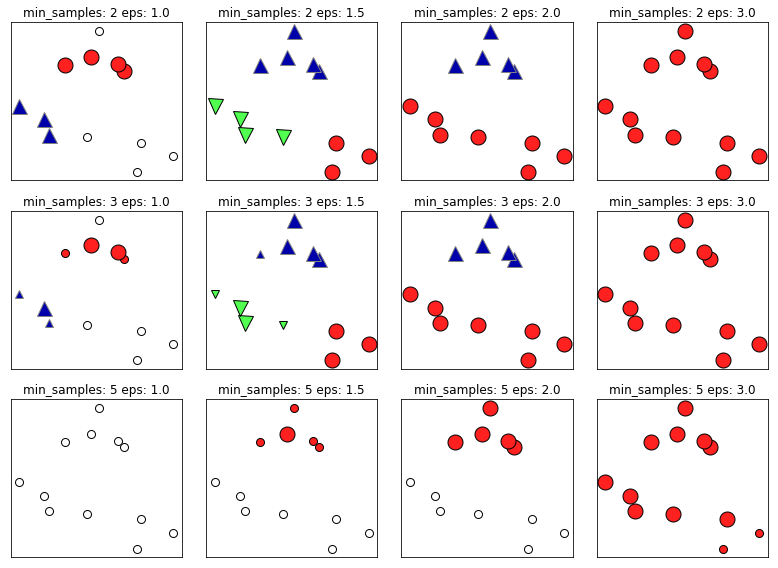

In [28]:
mglearn.plots.plot_dbscan()

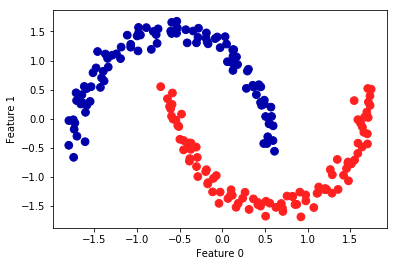

In [31]:
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

In [33]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00
